# **Portfolio Update 2**
### *Tidy Data Project - Federal R&D Budgets*
#### Adapted from: https://github.com/rfordatascience/tidytuesday/tree/main/data/2019/2019-02-12
#### Process Sources: (1) https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf, (2) https://vita.had.co.nz/papers/tidy-data.pdf, (3) https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html#pandas.Series.str.replace & (4) https://docs.python.org/3/library/stdtypes.html#str.replace
#### *Additional notes: Please refer to "README.md" housed under the "TidyData-Project" file for additional information on interpretation and refer to "data_clean" file to download the cleaned data. Additional information on how to access the Streamlit app is also included in the same "README.md."*

## 0: Setting up workstation

In [2]:
# importing necessary packages
import pandas as pd                                     # for data manipulation
import seaborn as sns                                   # for plotting
import matplotlib.pyplot as plt                         # for plotting
import streamlit as st                                  # for interactive app development
import numpy as np                                      # computing

# selecting dataset
df_budget = pd.read_csv("data/fed_rd_year&gdp.csv")     # reading csv file - using relative path
df_budget_clean = df_budget.copy()

# formatting display
pd.options.display.float_format = '{:f}'.format         # making display for dataframes not default to scientific notation

## 1: Data cleaning & tidying

### 1.1: Basic exploration of data

**Inputs**


In 1.1, I will be confirming (a) the number of observations by printing the list of departments (which is the level of analysis) and (b) print the total number of columns to start to understand what variables the values in the columns correspond to. I will use the function len, which finds the total numbers of items in an object.

In [3]:
print(df_budget.department)         # confirming observation level of analysis is departments
print(f"\nThere are {len(df_budget_clean.department)} observations in the dataset.\n")    # counting number of observations

print((df_budget.columns))          # confirming column names
print(f"\nThere are {len(df_budget.columns)} columns in the dataset.")       # confirming number of columns

0          DHS
1          DOC
2          DOD
3          DOE
4          DOT
5          EPA
6          HHS
7     Interior
8         NASA
9          NIH
10         NSF
11       Other
12        USDA
13          VA
Name: department, dtype: object

There are 14 observations in the dataset.

Index(['department', '1976_gdp1790000000000.0', '1977_gdp2028000000000.0',
       '1978_gdp2278000000000.0', '1979_gdp2570000000000.0',
       '1980_gdp2797000000000.0', '1981_gdp3138000000000.0',
       '1982_gdp3314000000000.0', '1983_gdp3541000000000.0',
       '1984_gdp3953000000000.0', '1985_gdp4270000000000.0',
       '1986_gdp4536000000000.0', '1987_gdp4782000000000.0',
       '1988_gdp5155000000000.0', '1989_gdp5570000000000.0',
       '1990_gdp5915000000000.0', '1991_gdp6110000000000.0',
       '1992_gdp6435000000000.0', '1993_gdp6795000000000.0',
       '1994_gdp7198000000000.0', '1995_gdp7583000000000.0',
       '1996_gdp7978000000000.0', '1997_gdp8483000000000.0',
       '1998_gdp8955000000000

**Outputs**

I will receive (a) a list of all observations (i.e., rows in the first column) and (b) a list of all of the columns. I will also receive (a)(b) a count for each, which are 14 and 43, respectively.

### 1.2: Melting data

**Input**

In 1.2, I will be melting the dataset. Melting is necessary as the data is in "wide" as opposed to "long" form. Given that it is in "long" form, multiple observations are in one row. Furthermore, the variable names should be values within columns. According to the Tiday Data principles, each observation forms a row and each variable forms a column. Neither of those two are true.

By using pd.melt, I can transform the dataframe so that there is a row for each observations. In this new database, the column "department" will be the level of analysis, which is shown by placing it with "id_vars". The two new columns will be "Year_GDP" and "budget". "Year_GDP", which is associated with "value_vars", will take on the old variables as its values. The other new column, "Budget", will contain the values listed under the old variables as it is the entry for "value_name".

In [4]:
# preparing for melting
budget_column_names = pd.Series(df_budget.columns)       # turning column names into series for easier input into melt (value_vars)
budget_column_names_1 = budget_column_names.drop([0])    # dropping "department" from series (it will be id_vars)
print(budget_column_names_1)                             # confirming "department" was dropped

budget_column_names_2 = budget_column_names_1.tolist()   # converting to list for entry into melt

1      1976_gdp1790000000000.0
2      1977_gdp2028000000000.0
3      1978_gdp2278000000000.0
4      1979_gdp2570000000000.0
5      1980_gdp2797000000000.0
6      1981_gdp3138000000000.0
7      1982_gdp3314000000000.0
8      1983_gdp3541000000000.0
9      1984_gdp3953000000000.0
10     1985_gdp4270000000000.0
11     1986_gdp4536000000000.0
12     1987_gdp4782000000000.0
13     1988_gdp5155000000000.0
14     1989_gdp5570000000000.0
15     1990_gdp5915000000000.0
16     1991_gdp6110000000000.0
17     1992_gdp6435000000000.0
18     1993_gdp6795000000000.0
19     1994_gdp7198000000000.0
20     1995_gdp7583000000000.0
21     1996_gdp7978000000000.0
22     1997_gdp8483000000000.0
23     1998_gdp8955000000000.0
24     1999_gdp9511000000000.0
25    2000_gdp10148000000000.0
26    2001_gdp10565000000000.0
27    2002_gdp10877000000000.0
28    2003_gdp11332000000000.0
29    2004_gdp12089000000000.0
30    2005_gdp12889000000000.0
31    2006_gdp13685000000000.0
32    2007_gdp14323000000000.0
33    20

In [5]:
# melting dataset
df_budget_clean_1 = pd.melt(df_budget,      # melting df_budget_1
        id_vars = "department",                 # using "department" as level of analysis
        value_vars = budget_column_names,       # identifying the column names (w/ out "department") as value_vars
        var_name= "Year_GDP",                   # naming 1st new column "Year_GDP" (will change in df_budget_3 when split)
        value_name = "Budget")                  # naming 2nd new column "Budget"

print(df_budget_clean_1.head(15))                        # confirming melt by looking at first 25 observations

   department                 Year_GDP             Budget
0         DHS  1976_gdp1790000000000.0                NaN
1         DOC  1976_gdp1790000000000.0   819000000.000000
2         DOD  1976_gdp1790000000000.0 35696000000.000000
3         DOE  1976_gdp1790000000000.0 10882000000.000000
4         DOT  1976_gdp1790000000000.0  1142000000.000000
5         EPA  1976_gdp1790000000000.0   968000000.000000
6         HHS  1976_gdp1790000000000.0  9226000000.000000
7    Interior  1976_gdp1790000000000.0  1152000000.000000
8        NASA  1976_gdp1790000000000.0 12513000000.000000
9         NIH  1976_gdp1790000000000.0  8025000000.000000
10        NSF  1976_gdp1790000000000.0  2372000000.000000
11      Other  1976_gdp1790000000000.0  1191000000.000000
12       USDA  1976_gdp1790000000000.0  1837000000.000000
13         VA  1976_gdp1790000000000.0   404000000.000000
14        DHS  1977_gdp2028000000000.0                NaN


**Output**

I will receive a new table with 3 columns, each representing a variable.

The variable for the first column is "department", which contains the names of the level of analysis. However, instead of being only include once, there are multiple observations for the same department as for every year, there are different values associated with the departments. 

There will also be a "Year_GDP" variable, which includes both the year and the US' GDP in said year. However, this column contains values for what should be two different variables according to Tidy Data principles, which will be addressed in 1.3.

The final column is the variable "Budget", which contains the department's budget in the year the observation is covering.

### 1.3: Further cleaning and tidying of data

**Input**

In 1.3, I will (a) be splitting the variable containing both year and GDP, (b) dropping strings from the new columns formed from the split, and (c) adjusting data types and variable names. I will do (a) and (b) by using "str.split" and "str.replace" from the Python Standard Library, respectively (which is process source (4) and can be accessed through process source (3)).

In (a), I will be splitting the variable "Year_GDP" into two variables (one will be "Year" and the other "GDP") using "str.split" as its current format violates the Tidy Data principle of each variable having its own column. There is an underscore (_) between the year and GDP, which will be used as my splitting point. Two new columns will be made as I will enter "expand = True", which breaks the two new strings into their own columns.

In (b), I will be dropping the string "gdp" in the new column "GDP". I will do this by using "str.replace". Using this command, I will replace "gdp" with nothing (as seen by using ""). By doing so, I am placing the dataset in line with the Tidy Data principle that columns must only contain one value.

In (c), I will be adjusting "GDP" to  float and "Year" to datetime using pd.to_datetime, specificying that I would like it to be as a year by placong ".dt.year" at the end of the line of code. They are currently strings, which limit their ability to be analyzed. I will also be cleaning up variable names by changing "department" to "Department" so that they fall in line with the rest of the variables stylistically.

In [6]:
# splitting and dropping "Year_GDP"
df_budget_clean_2 = df_budget_clean_1.copy()                                                     # creating a new dataframe, which is a copy of the second
df_budget_clean_2[["Year","GDP"]] = df_budget_clean_2["Year_GDP"].str.split("_", expand = True)  # splitting "Year_GDP", where the divide is at "_" and the result of the split are captured in two new columns
df_budget_clean_2["GDP"] = df_budget_clean_2["GDP"].str.replace("gdp", "")                       # dropping the string "gdp" from variable "GDP"


df_budget_clean_3 = df_budget_clean_2.drop(columns = "Year_GDP")                                 # dropping "Year_GDP" given the two new columns


print(df_budget_clean_3)

    department             Budget  Year               GDP
0          DHS                NaN  1976   1790000000000.0
1          DOC   819000000.000000  1976   1790000000000.0
2          DOD 35696000000.000000  1976   1790000000000.0
3          DOE 10882000000.000000  1976   1790000000000.0
4          DOT  1142000000.000000  1976   1790000000000.0
..         ...                ...   ...               ...
583        NIH 33052000000.000000  2017  19177000000000.0
584        NSF  6040000000.000000  2017  19177000000000.0
585      Other  1553000000.000000  2017  19177000000000.0
586       USDA  2625000000.000000  2017  19177000000000.0
587         VA  1367000000.000000  2017  19177000000000.0

[588 rows x 4 columns]


In [7]:
# adjusting data types and column names
print(df_budget_clean_3[["department", "Budget", "Year", "GDP"]].dtypes)                 # confirming data types


df_budget_clean_4 = df_budget_clean_3.copy()                                             # creating a new dataframe, which is a copy of the fourth 

df_budget_clean_4["GDP"] = df_budget_clean_4["GDP"].astype(float)                        # converting "GDP" to float

df_budget_clean_4["Year"] = pd.to_datetime(df_budget_clean_4["Year"]).dt.year  # changing "Year" to dt, using method stringing to change to just year (dropping day and month)

df_budget_clean_4= df_budget_clean_4.rename(columns = {"department" : "Department"})     # changing name of "department" to "Department" to ensure consistency

print(df_budget_clean_4[["Department", "Budget", "Year", "GDP"]].dtypes)                 # confirming data types

print(df_budget_clean_4)

department     object
Budget        float64
Year           object
GDP            object
dtype: object
Department     object
Budget        float64
Year            int32
GDP           float64
dtype: object
    Department             Budget  Year                   GDP
0          DHS                NaN  1976  1790000000000.000000
1          DOC   819000000.000000  1976  1790000000000.000000
2          DOD 35696000000.000000  1976  1790000000000.000000
3          DOE 10882000000.000000  1976  1790000000000.000000
4          DOT  1142000000.000000  1976  1790000000000.000000
..         ...                ...   ...                   ...
583        NIH 33052000000.000000  2017 19177000000000.000000
584        NSF  6040000000.000000  2017 19177000000000.000000
585      Other  1553000000.000000  2017 19177000000000.000000
586       USDA  2625000000.000000  2017 19177000000000.000000
587         VA  1367000000.000000  2017 19177000000000.000000

[588 rows x 4 columns]


**Output**

I will receive (a) two new columns, which are "Year" and "GDP" while dropping the column "Year_GDP".

I will then receive (b) a modified "GDP" column, which no longer includes the characters "gdp" before the number that is the GDP.

Finally, I will receive (c) a table where each column is an appropriate datatype. The variables (i.e., the first row of each column) will also match stylistically.

### 1.4: Exporting data

**Input**

In 1.4, I will be exporting data so that the *clean* version is easily accessible. I will be making a csv and an excel file of the cleaned data. I will be using the functions "to_csv" and "to_excel", which require the entry of a path for where the files should be deposited.

In [8]:
df_budget_clean_final = df_budget_clean_4.copy()                            # copying for final version

df_budget_clean_final.to_csv("clean-data/df_budget_clean_final.csv")        # exporting as csv file

df_budget_clean_final.to_excel("clean-data/df_budget_clean_final.xlsx")     # exporting as excel file

**Output**

I will receive two files. The first is the cleaned dataset in csv format, while the second is in excel. They will be located in the folder "clean-data", which is inside "TidyData-Project".

## 2: Visualizations

### 2.1: Change of R&D on a departmental level over time

**Input**

In 2.1, I will illustrate the change in budget across the years for each department. I will be doing so by looping through the departments listed, graphing each unique one using "sns.lineplot". I will be creating a line plot as I am showing a change over time in a continuous variable.

Looping through is necessary as each observation needs to be ckeced to see what department it is associated with. "Unique" provides a list of department names where each unique department has one entry. By using enumerate, I ensure each department is tagged with an index, allowing them to be later placed on a plot.


To display all of the graphs together, I will use "plt.subplot", allowing me to divide the plot into multiple lots graphs can be placed in. In "plt.subplot", information is given in the order of (1) row count, (2) column count, and, finally (3) placement of each plot within the new row/column arrangement.

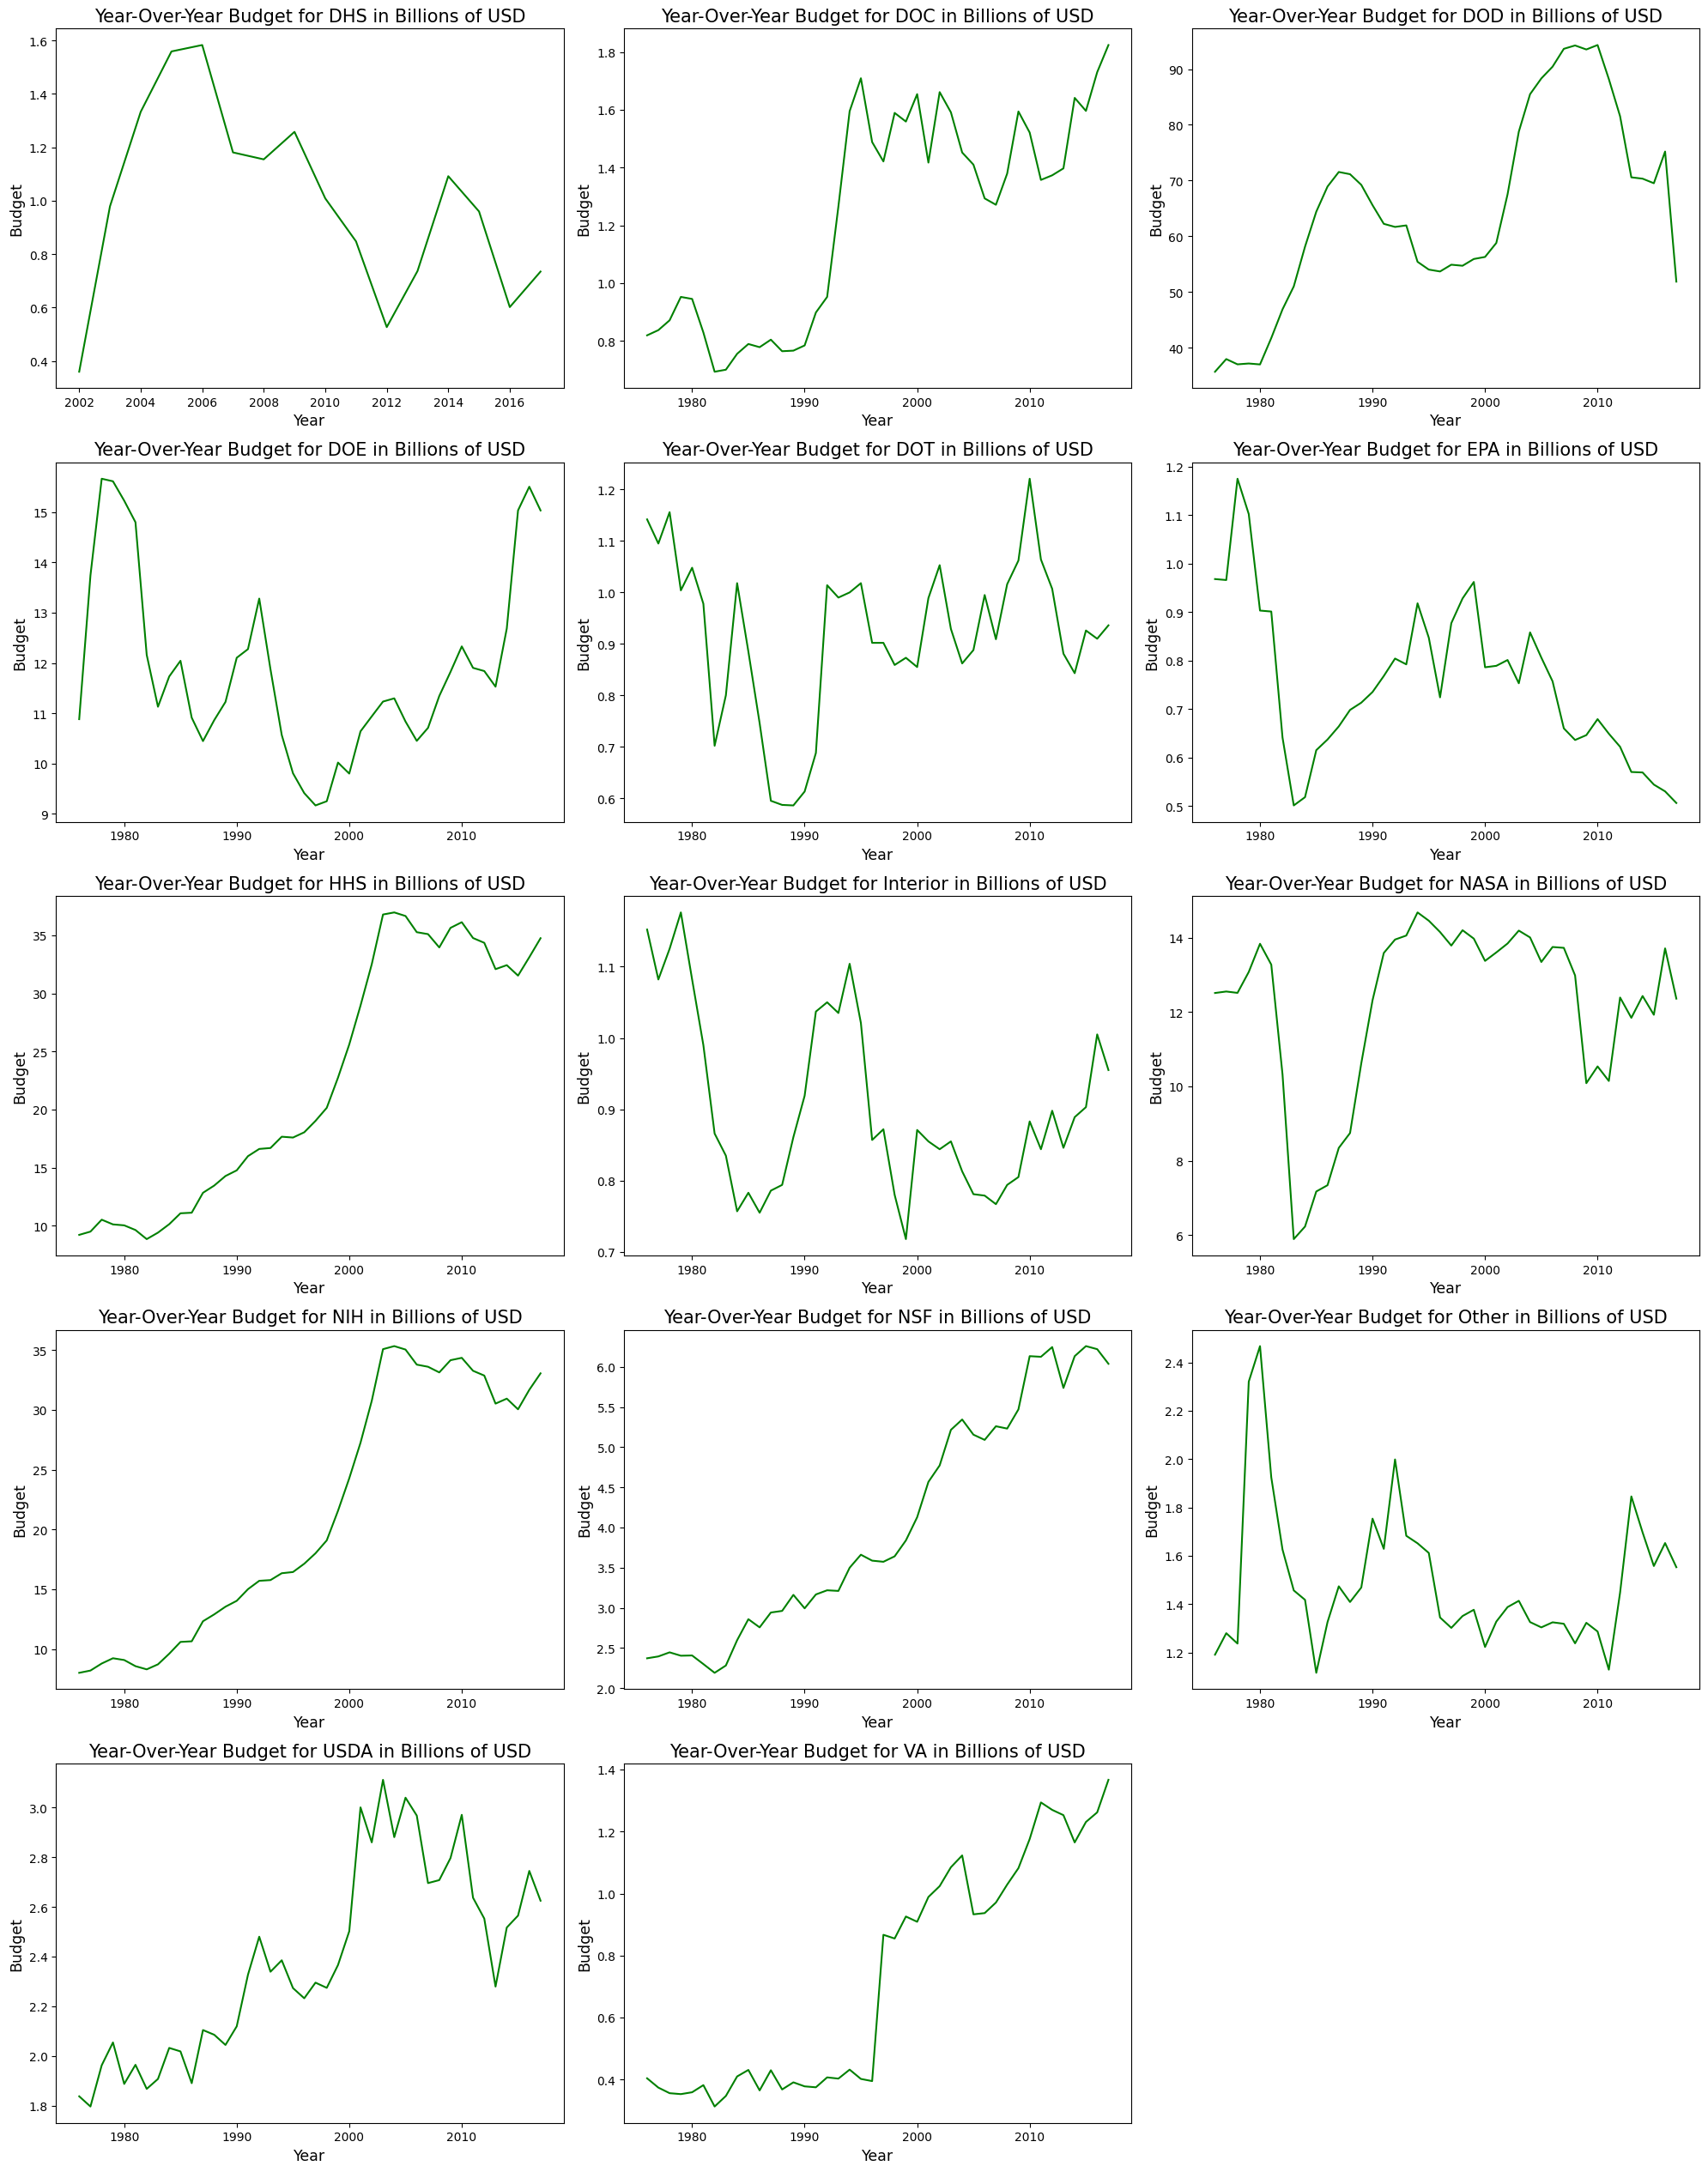

In [9]:
# setting up plot
plt.figure(figsize = (20,30))                                                                  # creating plot that is 20x30

# graphing information for each department
for i, Department in enumerate(df_budget_clean_final["Department"].unique()):                  # looping over unique values in department
    values_vis_1 = df_budget_clean_final[df_budget_clean_final["Department"] == Department]    # creating dataset broken out by department
    
    plt.subplot(6, 3, i+1)                                                                     # creating 18 subplots, of which 14 will be used
    sns.lineplot(x=values_vis_1["Year"],
                y=values_vis_1["Budget"] / 10**9, color = "green")                             # plotting "Year" against "Budget" as a green line, with each of the 14 graphs detailing a different department
    
    plt.title(f"Year-Over-Year Budget for {Department} in Billions of USD", fontsize = 15)                    # creating titles for graph and axes
    plt.xlabel("Year", fontsize = 12.5)
    plt.ylabel("Budget", fontsize = 12.5)

# finalizing graph
plt.tight_layout()                                                                             # adjusting dimensions for readability
plt.show()

**Output**

I will receive 14 graphs that each have a line detailing how the budget changed for each department over the years measured. The scale will be in the billions, meaning if for one year a department reports a budget of 1 trillion, it will appear as 1 on the graphs.

### 2.2: Change in GDP over time

**Input**

In 2.2, I will be plotting the variable "Year" against "GDP" using the "sns.lineplot" function. I will be using a line plot as I am looking at the change of a continuous variable over a period of time.

To illustrate the trend the graph shows, I will be calculating the compound annual growth rate (CAGR) and plotting a line to represent it. The formula for CAGR is (end value / start value)^(1/period) - 1. I will also be entering "green" into "color" to have consistency in color across all graphs in section 2.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


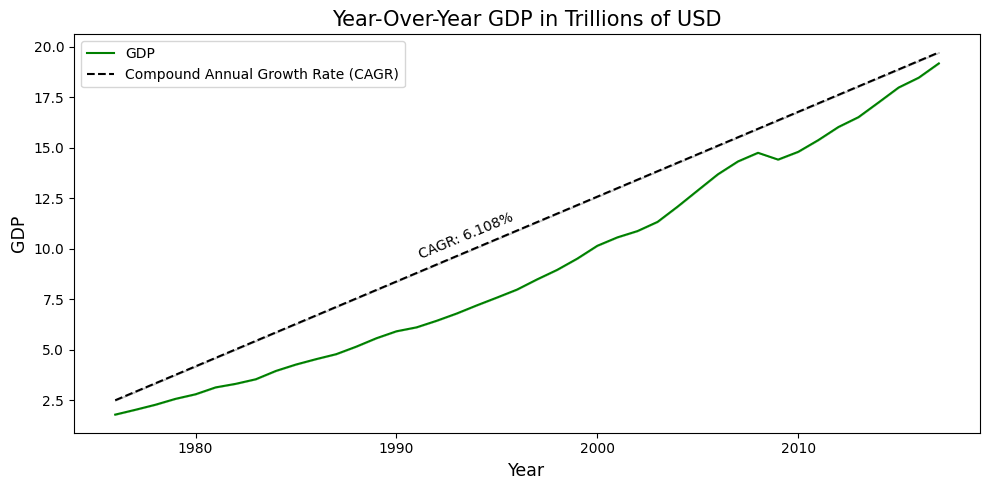

In [10]:
# setting up plot
plt.figure(figsize=(10, 5))                                                                        # creating plot that is 10x5

# plotting GDP in trillions of USD
sns.lineplot(df_budget_clean_final["Year"],                                                        # plotting "Year" against "GDP" scaled to trillions as a green line
         df_budget_clean_final["GDP"] / 10**12, color = "green", 
         label = "GDP")

plt.title("Year-Over-Year GDP in Trillions of USD", fontsize = 15)                                                # creating titles for graph and axes
plt.xlabel("Year", fontsize = 12.5)
plt.ylabel("GDP",  fontsize = 12.5)

# calculating CAGR
gdp_0 = df_budget_clean_final["GDP"].iloc[0]                                                       # determining first and last GDP values
gdp_1 = df_budget_clean_final["GDP"].iloc[-1]


periods = df_budget_clean_final["Year"].iloc[-1] - df_budget_clean_final["Year"].iloc[0] - 1       # determining number of periods by subtracting one from the difference in years between the first and last GDP

cagr = ((gdp_1 / gdp_0) ** (1 / periods) - 1) * 100                                                # calculating cagr
cagr_rounded = round(cagr, 3)                                                                      # rounding cagr for ease

# plotting and labelling CAGR line
cagr_line = (df_budget_clean_final["Year"] - 
             df_budget_clean_final["Year"].iloc[0]) * .42 + 2.5                                    # creating line to REPRESENT cagr (not actual line) 

sns.lineplot(df_budget_clean_final["Year"], cagr_line, color = "black", 
         linestyle = "--", 
         label = "Compound Annual Growth Rate (CAGR)")                                             # plotting line as dashed and black

x = df_budget_clean_final["Year"].iloc[210]                                                        # determining label location on plot
y = df_budget_clean_final["GDP"].iloc[300] / 10**12
plt.text(x, y + 1, f"CAGR: {cagr_rounded}%", rotation=22.5)                                        # adding label to cagr line

# finalizing graph
plt.legend()                                                                                       # adding legend
plt.tight_layout()                                                                                 # adjusting dimensions for readability
plt.show()

**Output**

I will receive one graph with two lines. The first line (the green one) will have varying gradients as it is showing change over time--not an overarching trend. The second line (the dashed black one) will have a constant gradient as its purpose is to illustrate how over time the GDP grows. There will also be a legend detailing what each line means.

### 2.3: Average budget per department

**Input**

In 2.3, I will be making a bar plot showcasing the average budget of each department using sns.barplot. I will be using a bar graph as I am plotting a series of nominal data for comparison.

To create the graph, I will group the data by department using the "groupby" function. Then, I will take the take the mean of each department using the "mean" function. They will be sorted in descending order using the "sort_values" function, showcasing the most significant spenders first.

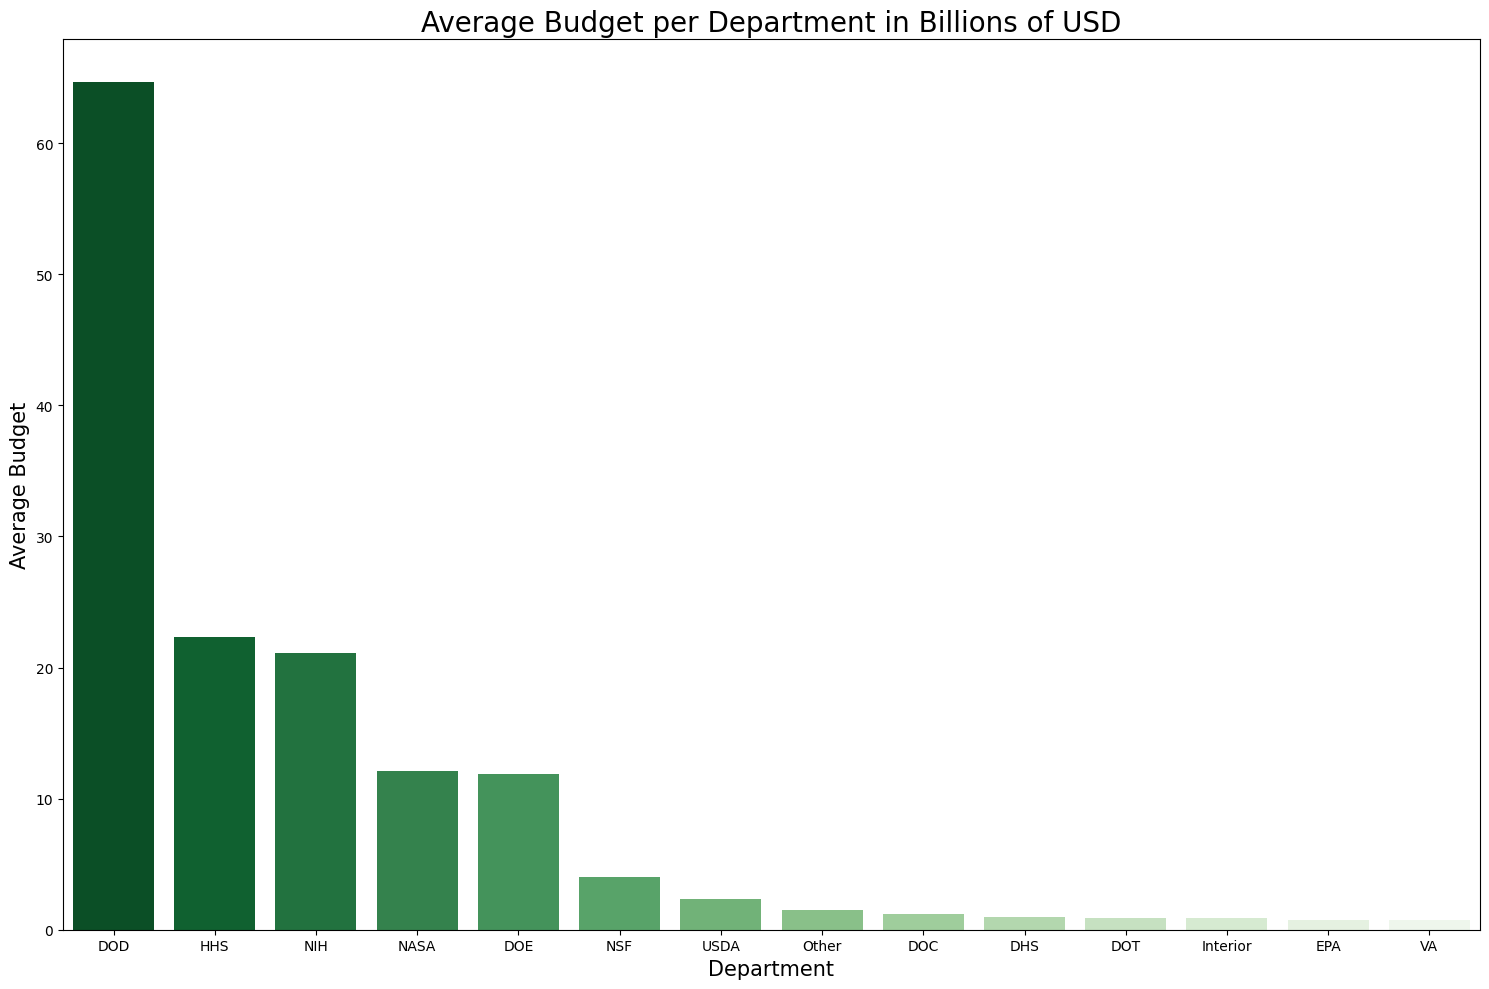

In [11]:
# setting up plot
plt.figure(figsize=(15,10))                                                                                               # creating plot that is 15x20

# preparing data for visualization
values_vis_3 = df_budget_clean_final.groupby("Department")["Budget"].mean().reset_index().sort_values(by = "Budget",      # making the values within value_vis_3 be the average budget for each department
                                                                                                      ascending=False)    # placing departments in descending order according to budget
values_vis_3["Budget"] = values_vis_3["Budget"] / 10**9                                                                   # dividing values by 1 billion

# plotting data
sns.barplot(x = "Department", y = "Budget", data = values_vis_3, palette = "Greens_r")                                    # plotting data, where values higher values are a darker shade of green than lower ones

plt.title("Average Budget per Department in Billions of USD", fontsize = 20)                                                             # creating titles for graph and axes
plt.xlabel("Department", fontsize = 15)
plt.ylabel("Average Budget", fontsize = 15)

# finalizing graph
plt.tight_layout()                                                                                                       # adjusting dimensions for readability
plt.show()

**Output**

I will receive a graph that lists all of the departments. The heaviest spenders will be on the left and have the darkest shade of green, with the shade becoming progressively lighter as the average budget of a department decreases.

## 3: Pivot-tables

### 3.1: Average Spending per Department

**Input**

In 3.1, I will develop a pivot table that helps us understand how much--on average--a department spent every year using "pd.pivot_table". The values will be "Budget" as it is associated with "values", and the values will be summarized as the average across all years as the "aggfunc" is "mean". The observations will be each department as that is listed under "index".

In [12]:
pivot_table_avg_spending = pd.pivot_table(df_budget_clean_final, 
                                          values="Budget", 
                                          index="Department",  
                                          aggfunc="mean")

print("Pivot Table: Average Budget per Department")
print(pivot_table_avg_spending)

Pivot Table: Average Budget per Department
                       Budget
Department                   
DHS          994875000.000000
DOC         1231500000.000000
DOD        64685190476.190475
DOE        11883380952.380953
DOT          917785714.285714
EPA          750428571.428571
HHS        22296761904.761906
Interior     900571428.571429
NASA       12140261904.761906
NIH        21117571428.571430
NSF         4038809523.809524
Other       1494761904.761905
USDA        2380809523.809524
VA           733880952.380952


**Output**

I will receive a table with two columns. The first column will be "Department", while the second will be "Budget". The value associated with the variable "Budget" for each observation is that department's average budget across all years measured.

### 3.2: Spending per Year

**Input**

In 3.2, I will develop a pivot table that shows the total federal government's R&D budget each year. The values will be "Budget" as it is associated with "values". The values will be the sum across all departments as "aggfunc" is "sum". It will also be the for each year as  "index" is "year".

In [13]:
pivot_table_yearly_spending = pd.pivot_table(df_budget_clean_final, 
                                          values="Budget", 
                                          index="Year",  
                                          aggfunc="sum")

print("Pivot Table: Spending per Year")
(pivot_table_avg_spending)

Pivot Table: Spending per Year


,Budget
Department,
DHS,994875000.000000
DOC,1231500000.000000
DOD,64685190476.190475
DOE,11883380952.380953
DOT,917785714.285714
EPA,750428571.428571
HHS,22296761904.761906
Interior,900571428.571429
NASA,12140261904.761906


**Output**

I will receive a table with two columns. "Year" will be the first column, while "Budget" will be the second. The value associated with the variable "Year" will be the total budget across all departments for that year.

## 4: Streamlit app